# Introduction

## Motivation

One of the most controversial design choices of Python is the use of dynamic types. Dynamic types of variables can often lead to confusion for beginners, but also for experts it is a common sources of hard-to-find bugs. For this reason the concept of type annotations has been introduced later in the language to allow for static code analysis and more detailed source code documentation. However, type annotations are not enforced by the Python interpreter and therefore do not prevent the user from passing the wrong type of data to a function or class. This can lead to delayed code failure, bad user experiences, and difficult-to-find bugs.

### **Example 1**: Dynamic typing can lead to unexpected behavior

For beginners the dynamic typing of Python can be a source of confusion. Consider the following example:

In [1]:
def my_function(x):
    return 2 * x

def my_other_function(x):
    return 2. * x


# Expected behaviour
print(my_function(3))

# Half-Expected behaviour
print(my_function(3.14))

# Possibly unexpected behaviour
print(my_function('hello'))
print(my_function(x=True))

# Now try this
#print(my_other_function('hello'))

6
6.28
hellohello
2


Python will "happily" execute the calls to `my_function`, but the result is possibly un-expected. In contrast the call to `my_other_function` fails. The reason is that the `*` operator is overloaded for strings / bools and integers, but not for strings and floats.

In [2]:
print(type(my_function('hello')))

<class 'str'>


### **Example 2**: Delayed code failure with non-validated input data

In this example we read an example input YAML file, which contains temperature data. The data is then used to calculate the average temperature. However, the input data is not validated and therefore the code will fail at a later point in time.

In [3]:
import yaml

def process_data(data):
    temperature = [_["temperature"] for _ in data]
    time = [_["time"] for _ in data]
    return {
        "temperature": temperature,
        "time": time,
    }

with open("../examples/my-data.yaml", "r") as fh:
    data = yaml.safe_load(fh)


processed = process_data(data=data)

# Compute mean
mean = sum(processed["temperature"]) / len(processed["temperature"])

TypeError: unsupported operand type(s) for +: 'int' and 'str'

This is especially annoying if the code is part of a larger application and the reading an processing takes time.

### **Example 3**: A "stupid bug" example (happend to everyone in the past...)

One last example is of the category "stupid bug": this includes typos, incorrect use of APIs and other mistakes that are easy to make and sometimes hard to find, often only by close inspection of the code. 

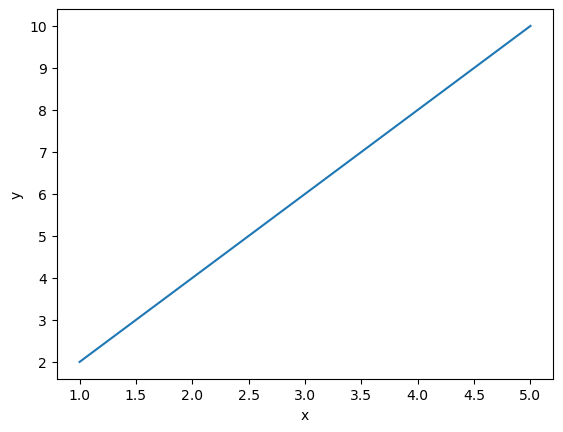

In [4]:
from matplotlib import pyplot as plt

x = [1, 2, 3, 4, 5]
y = [my_function(i) for i in x]

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.xlim = (0, 6) # Searching for half an hour why the plot has the wrong limits

In [5]:
plt.xlim(0, 6) # Now trying to correct in the notebook...ops even more confusing...

TypeError: 'tuple' object is not callable

### Refresher 1: Type Annotations

Python 3 introduced type annotations as a way to document the expected types of variables, function arguments, and return values. Type annotations are **not enforced by the Python interpreter**, but can be used by external tools to perform static code analysis. The most popular tool for this purpose is [mypy](http://mypy-lang.org/).

Quick survey:
- Who knows what type annotations are?
- Who is using type annotations regularly?
- Who would like to use type annotations more, but is not doing it yet?



In [6]:
%%writefile my_script.py
def my_function(x : int) -> int:
    return 2 * x

def my_other_function(x: float) -> float:
    return 2. * x

print(my_function(3))
print(my_function(3.14))

print(my_other_function("hello"))

Overwriting my_script.py


In [7]:
!cat my_script.py

def my_function(x : int) -> int:
    return 2 * x

def my_other_function(x: float) -> float:
    return 2. * x

print(my_function(3))
print(my_function(3.14))

print(my_other_function("hello"))


In [8]:
!mypy my_script.py

my_script.py:8: error: Argument 1 to "my_function" has incompatible type "float"; expected "int"  [arg-type]
my_script.py:10: error: Argument 1 to "my_other_function" has incompatible type "str"; expected "float"  [arg-type]
Found 2 errors in 1 file (checked 1 source file)


However in certain cases it can be useful to have a way to enforce type annotations at runtime. This is where the [pydantic](https://pydantic-docs.helpmanual.io/) library comes into play. Pydantic is a library that allows to define data classes with type annotations and to validate the input data against the type annotations.

### Refresher 2: Class Definitions

The main building blocks of object-oriented programming in Python are classes. Classes are used to define the structure of objects, which are instances of a class. Classes can contain data (attributes) and functions (methods).

In [9]:
class MyClass:
    def __init__(self, x: int, y: int):
        self.x: int = x # instance variable
        self.y: int = y

    def my_method(self, z: int) -> int:
        return self.x + self.y + z
    
my_object = MyClass(1, 2)
print(my_object.my_method(3))

6


In many cases classes are also used as data containers, i.e. to store data in a structured way. In this case the class is often called a data class. In Python 3.7 the `dataclass` decorator was introduced to simplify the definition of data classes. The `dataclass` decorator automatically generates the `__init__` method and the `__repr__` method for the class. The `__init__` method is used to initialize the class attributes, while the `__repr__` method is used to generate a string representation of the class instance.

In [10]:
from dataclasses import dataclass

@dataclass
class MyDataClass:
    x: int # class variable
    y: int

    def my_method(self, z: int) -> int:
        return self.x + self.y + z
    
my_data_object = MyDataClass(1, 2)
print(my_data_object.my_method(3))


6


## Installation

Of course https://docs.pydantic.dev/latest/install/

Note https://docs.pydantic.dev/latest/blog/pydantic-v2-alpha/

